# ECE232E Project1
# Hengyu Lou, 005035476
# Yanzhe Xu, 404946757
# Yucong Wang, 305036163
# Yutong Lu, 005027184

In [4]:
library('igraph')
library('Matrix')
library('pracma')


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union


Attaching package: ‘pracma’

The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu



# 1.1 (a)

In [280]:
# 1.1 (a)
plot_distri = function(n, p) {
    rn <- erdos.renyi.game(n, p, type = "gnp")
    deg <- degree(rn)
    print(paste("p =", p))
    print(paste("True variance:", var(deg)))
    print(paste("Theoretical variance:", n * p * (1 - p)))
    print(paste("True mean:", mean(deg)))
    print(paste("Theoretical mean:", n * p))
    hist(deg, breaks = seq(from = 0, to = max(deg) + 1, by = 1), xlab = "Degree", ylab = "Frequency", 
         main = paste("Histogram of p =", p))
    print("")
    return(rn)
}

[1] "p = 0.003"
[1] "True variance: 2.85845845845846"
[1] "Theoretical variance: 2.991"
[1] "True mean: 3.02"
[1] "Theoretical mean: 3"
[1] ""
[1] "p = 0.004"
[1] "True variance: 3.81278878878879"
[1] "Theoretical variance: 3.984"
[1] "True mean: 3.968"
[1] "Theoretical mean: 4"
[1] ""
[1] "p = 0.01"
[1] "True variance: 9.71637237237237"
[1] "Theoretical variance: 9.9"
[1] "True mean: 10.312"
[1] "Theoretical mean: 10"
[1] ""
[1] "p = 0.05"
[1] "True variance: 50.2486486486486"
[1] "Theoretical variance: 47.5"
[1] "True mean: 49.94"
[1] "Theoretical mean: 50"
[1] ""
[1] "p = 0.1"
[1] "True variance: 86.4024024024024"
[1] "Theoretical variance: 90"
[1] "True mean: 99.7"
[1] "Theoretical mean: 100"
[1] ""


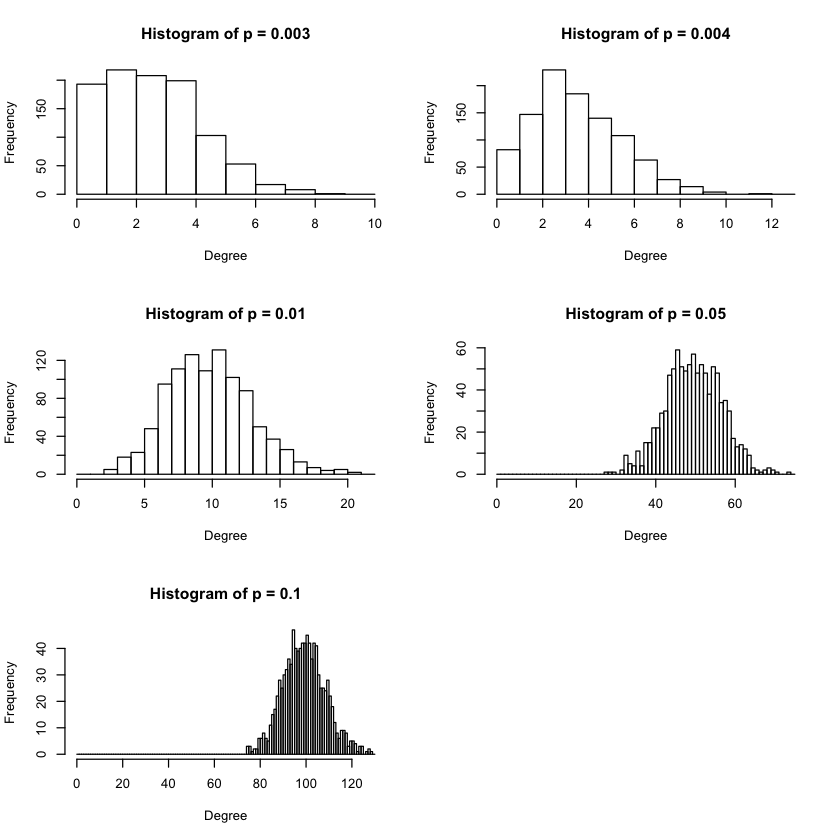

In [281]:
par(mfrow = c(3,2))
rn1 <- plot_distri(1000, 0.003) 
rn2 <- plot_distri(1000, 0.004) 
rn3 <- plot_distri(1000, 0.01) 
rn4 <- plot_distri(1000, 0.05) 
rn5 <- plot_distri(1000, 0.1) 

# 1.1 (b)

In [8]:
# 1.1 (b)
get_gcc_compu_dia = function(g, p) { 
    flag <- is.connected(g)
    print(paste("The ER network (p =", p, ") is connected:", flag))
    if (!flag) {
        # Find GCC
        g.components <- clusters(g)
        print("The size of each component:")
        print(g.components$csize)
        # which is the largest component
        ix <- which.max(g.components$csize)
        # get the subgraph correspondent to just the giant component
        g.giant <- induced.subgraph(g, which(g.components$membership == ix))
        print(paste("The diameter of the GCC (p =", p, "):", diameter(g.giant)))
        # components <- decompose.graph(rn)
        # index <- which.max(sapply(components, vcount))
        # gcc <- components[[index]]
        # print(diameter(gcc))
        # plot(gcc,vertex.size=8, vertex.label.cex=0.7)
        return(g.giant)
    }
    else return(g)
}

In [278]:
gcc1 <- get_gcc_compu_dia(rn1, 0.003)
gcc2 <- get_gcc_compu_dia(rn2, 0.004) 
gcc3 <- get_gcc_compu_dia(rn3, 0.01) 
gcc4 <- get_gcc_compu_dia(rn4, 0.05) 
gcc5 <- get_gcc_compu_dia(rn5, 0.1) 

[1] "The ER network (p = 0.003 ) is connected: FALSE"
[1] "The size of each component:"
 [1] 959   1   1   1   1   1   2   1   2   1   1   1   1   1   1   1   1   1   1
[20]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
[39]   1   1
[1] "The diameter of the GCC (p = 0.003 ): 14"
[1] "The ER network (p = 0.004 ) is connected: FALSE"
[1] "The size of each component:"
 [1] 977   1   1   1   1   1   1   1   2   2   1   1   1   1   1   1   1   1   1
[20]   1   1   1
[1] "The diameter of the GCC (p = 0.004 ): 10"
[1] "The ER network (p = 0.01 ) is connected: TRUE"
[1] "The ER network (p = 0.05 ) is connected: TRUE"
[1] "The ER network (p = 0.1 ) is connected: TRUE"


In [9]:
est_connect = function(n, p) {
    cnt <- 0;
    for (i in 1: 100000) {
        g <- erdos.renyi.game(n, p, type = "gnp")
        if (is.connected(g)) cnt <- cnt + 1
    }
    return(cnt / 100000)
}

In [1]:
print(est_connect(1000, 0.003))
print(est_connect(1000, 0.004))
print(est_connect(1000, 0.01))
print(est_connect(1000, 0.05))
print(est_connect(1000, 0.1))

[1] 0
[1] 0
[1] 0.95649
[1] 1
[1] 1


# 1.1 (c)

[1] "Empirical estimation the of p: 0.00638"


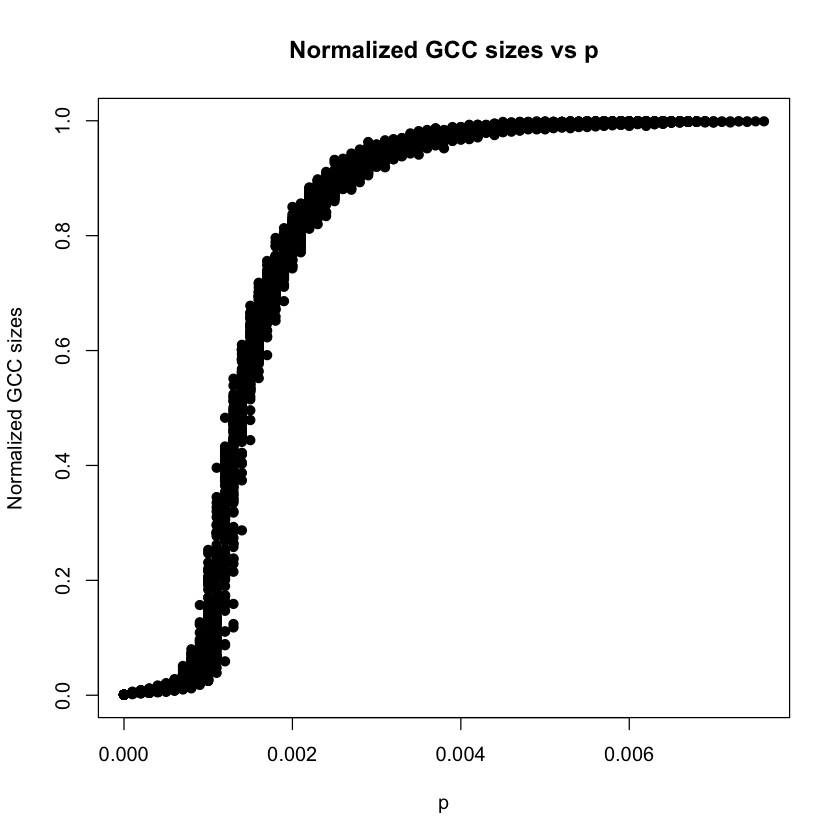

In [131]:
# 1.1 (c)
gcc_sizes <- numeric()
probs <- numeric()
p_merges <- numeric()

for (i in 1: 100) {
    for (p in seq(from = 0, to = 1.00, by = 1e-04)) {
        g <- erdos.renyi.game(1000, p, type="gnp")
        if (is.connected(g)) break
        else {
            components <- decompose.graph(g)
            index <- which.max(sapply(components, vcount))
            gcc <- components[[index]]
        
            gcc_sizes <- c(gcc_sizes, vcount(gcc) / 1000)
            probs <- c(probs, p)
        }
    }
    p_merges <- c(p_merges, p)
}

p_merge <- mean(p_merges)
print(paste("Empirical estimation the of p:", p_merge))
plot(probs, gcc_sizes, main = "Normalized GCC sizes vs p", 
     xlab = "p", ylab = "Normalized GCC sizes", pch = 19)

# 1.1 (d)

In [9]:
# 1.1 (d)

get_probs_nodes_gcc_sizes = function(c) {
    gcc_sizes <- numeric()
    probs <- numeric()
    nodes <- numeric()
    for (n in 100: 1000) {
        p <- c / n
        gcc_size <- 0
        for (cnt in 1: 100) {
            g <- erdos.renyi.game(n, p, type="gnp")
            components <- decompose.graph(g)
            index <- which.max(sapply(components, vcount))
            gcc <- components[[index]]

            gcc_size <- gcc_size + vcount(gcc)
        }
        gcc_size <- gcc_size / 100

        gcc_sizes <- c(gcc_sizes, gcc_size)
        probs <- c(probs, p)
        nodes <- c(nodes, n)
    }
    return(list(probs, nodes, gcc_sizes))
}

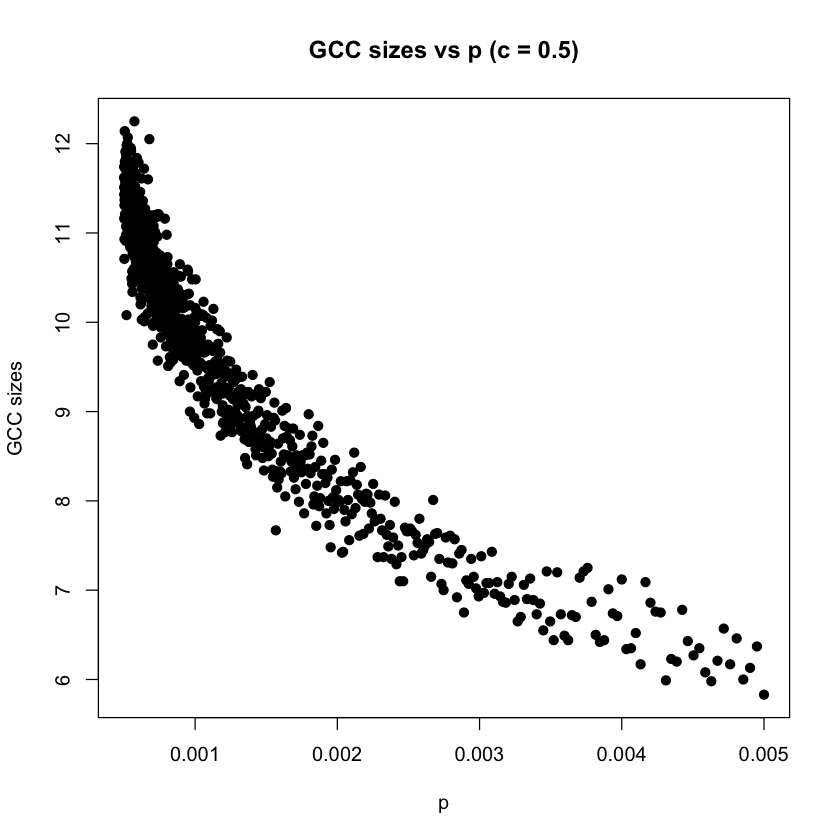

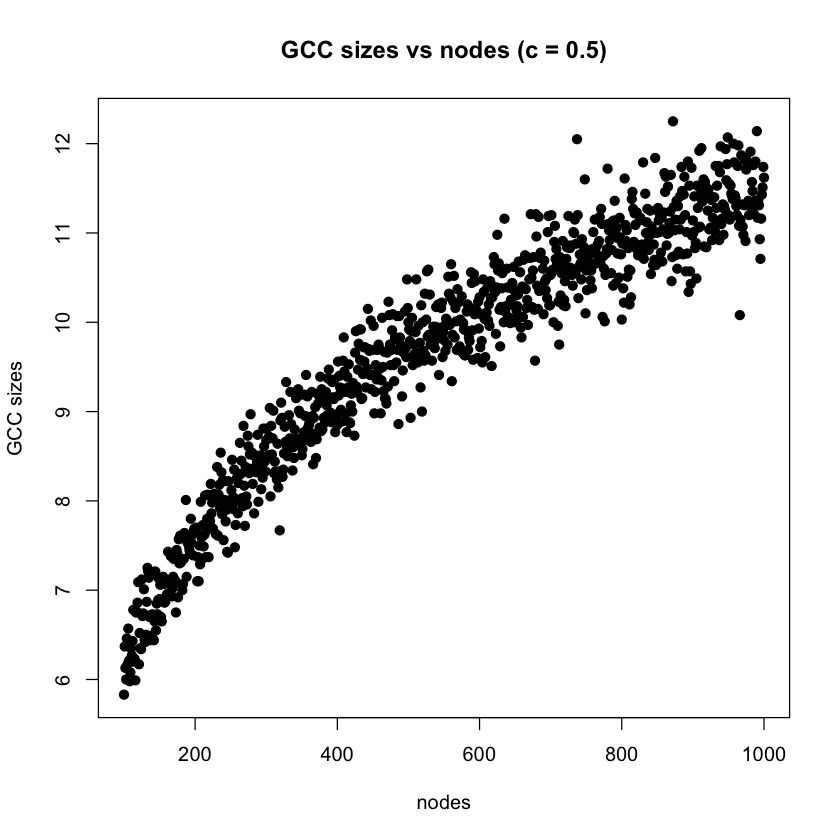

In [11]:
result05 <- get_probs_nodes_gcc_sizes(0.5) 

plot(result05[[1]], result05[[3]], main = "GCC sizes vs p (c = 0.5)", 
     xlab = "p", ylab = "GCC sizes", pch = 19)
plot(result05[[2]], result05[[3]], main = "GCC sizes vs nodes (c = 0.5)", 
     xlab = "nodes", ylab = "GCC sizes", pch = 19)

[1] 1

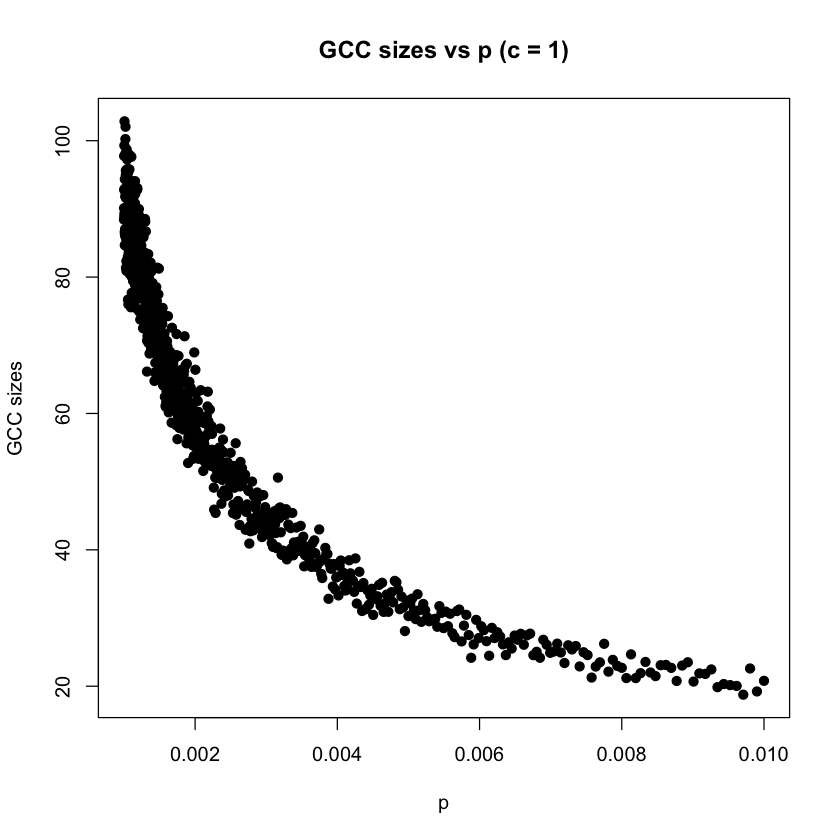

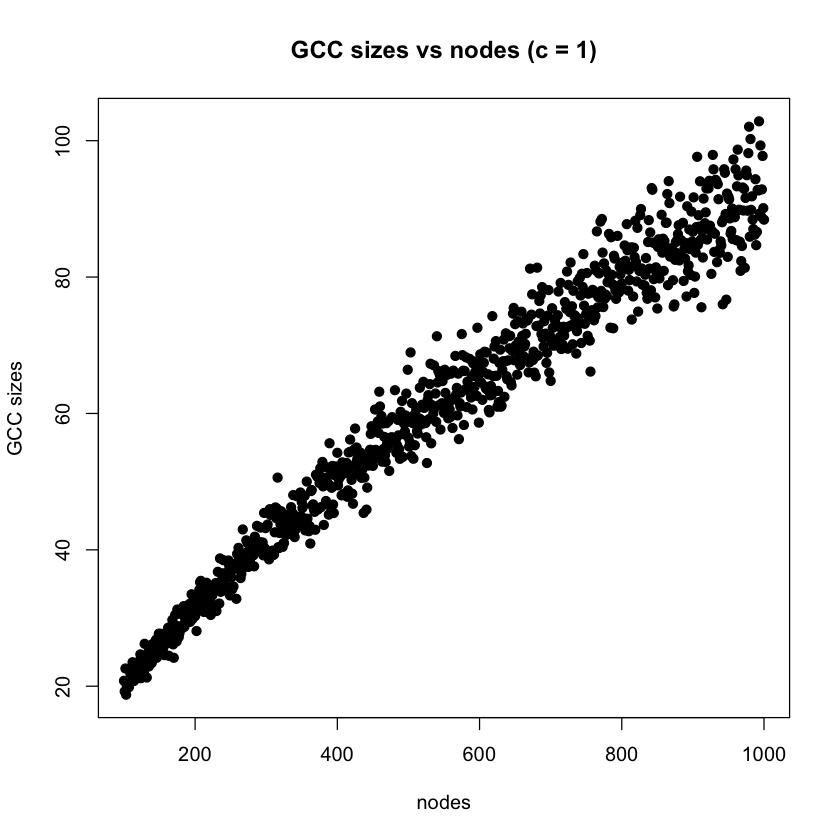

In [10]:
result1 <- get_probs_nodes_gcc_sizes(1) 

length(result1[1])
plot(result1[[1]], result1[[3]], main = "GCC sizes vs p (c = 1)", 
     xlab = "p", ylab = "GCC sizes", pch = 19)
plot(result1[[2]], result1[[3]], main = "GCC sizes vs nodes (c = 1)", 
     xlab = "nodes", ylab = "GCC sizes", pch = 19)

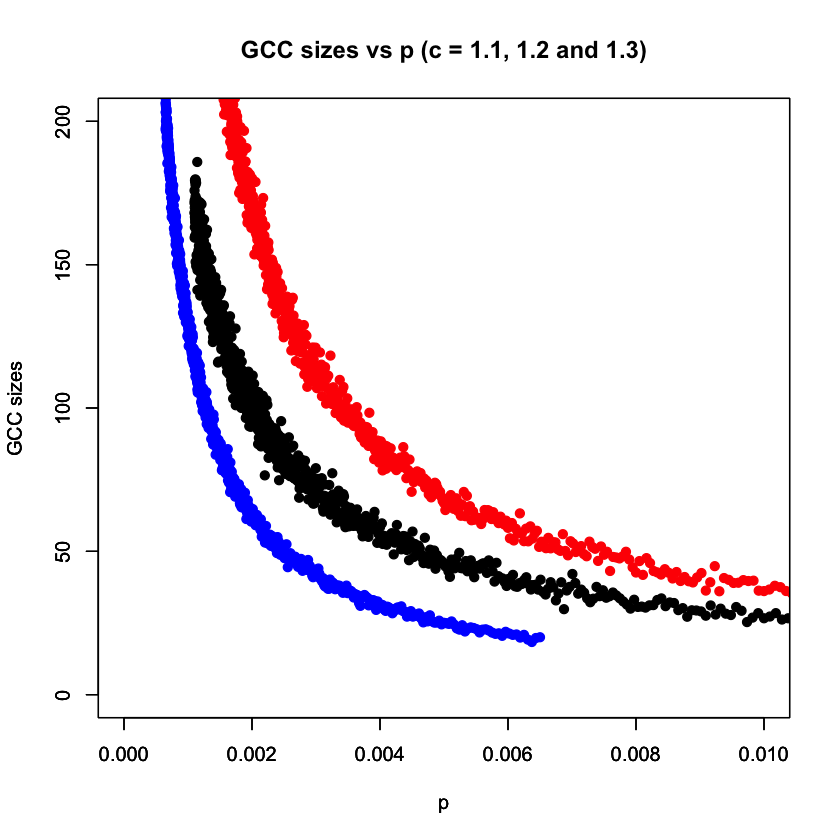

In [32]:
result11 <- get_probs_nodes_gcc_sizes(1.1) 
result12 <- get_probs_nodes_gcc_sizes(1.2) 
result13 <- get_probs_nodes_gcc_sizes(1.3) 

plot(result11[[1]], result11[[3]], main = "GCC sizes vs p (c = 1.1, 1.2 and 1.3)",
    xlim = c(0, 0.01), ylim = c(0, 200), xlab = "p", ylab = "GCC sizes", pch = 19)
par(new = TRUE)
plot(result12[[1]], result12[[3]], xlim = c(0,0.01), ylim = c(0, 200), col = 'red',
     xlab = "p", ylab = "GCC sizes", pch = 19)
par(new = TRUE)
plot(result13[[1]]/2, result13[[3]]/2, xlim = c(0,0.01), ylim = c(0, 200), col = 'blue',
     xlab = "p", ylab = "GCC sizes", pch = 19)

In [223]:
# 1.2 (a) (b) (c)
# g1 <- sample_pa(1000, m = 1, directed = FALSE)
g1 <- barabasi.game(1000, m = 1, directed = FALSE)
cs1 <- cluster_fast_greedy(g1)
print(paste("The modularity of an undirected graph (n = 1000, m = 1):", modularity(cs1)))

# g2 <- sample_pa(10000, m = 1, directed = FALSE)
g2 <- barabasi.game(10000, m = 1, directed = FALSE)
cs2 <- cluster_fast_greedy(g2)
print(paste("The modularity of an undirected graph (n = 10000, m = 1):", modularity(cs2)))

[1] "The modularity of an undirected graph (n = 1000, m = 1): 0.932091250409571"
[1] "The modularity of an undirected graph (n = 10000, m = 1): 0.978369379092139"


[1] "The slope (n = 1000, m = 1): -2.18151912107865"


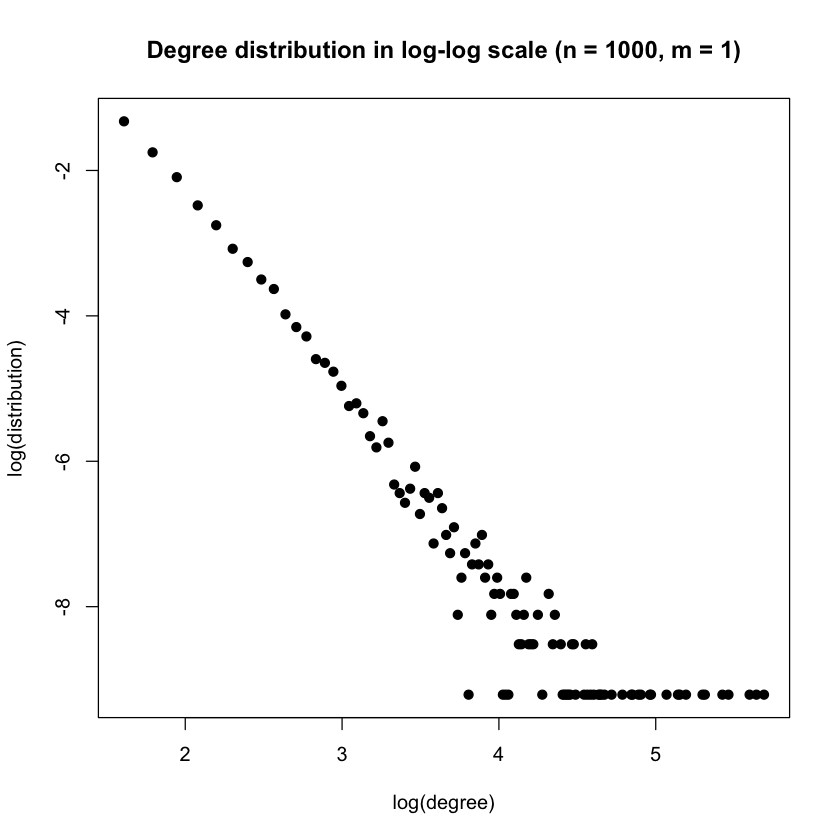

[1] "The slope (n = 10000, m = 1): -2.28236411486084"


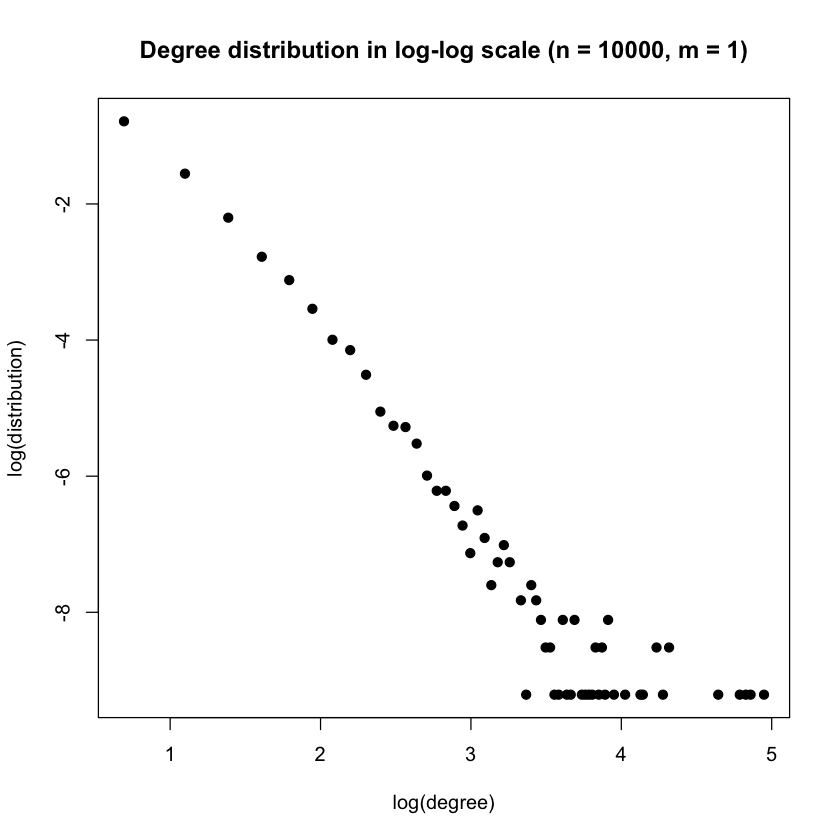

In [291]:
# 1.2 (d)
# n = 1000
dd1 <- degree_distribution(g1)
logk1 <- numeric()
logPk1 <- numeric()
for (i in 2: length(dd1)) {
    if (dd1[i] > 0) {
        logk1 <- c(logk1, log(i-1))
        logPk1 <- c(logPk1, log(dd1[i]))
    }
}
plot(logk1, logPk1, xlab = "log(degree)", ylab = "log(distribution)",
     main = "Degree distribution in log-log scale (n = 1000, m = 1)", pch = 19)
slope1 <- lm(logPk1 ~ logk1)$coefficients[2] # get slope
print(paste("The slope (n = 1000, m = 1):", slope1))

# n = 10000
dd2 <- degree_distribution(g2)
logk2 <- numeric()
logPk2 <- numeric()
for (i in 2: length(dd2)) {
    if (dd2[i] > 0) {
        logk2 <- c(logk2, log(i-1))
        logPk2 <- c(logPk2, log(dd2[i]))
    }
}
plot(logk2, logPk2, xlab = "log(degree)", ylab = "log(distribution)",
     main = "Degree distribution in log-log scale (n = 10000, m = 1)", pch = 19)
slope2 <- lm(logPk2 ~ logk2)$coefficients[2] # get slope
print(paste("The slope (n = 10000, m = 1):", slope2))


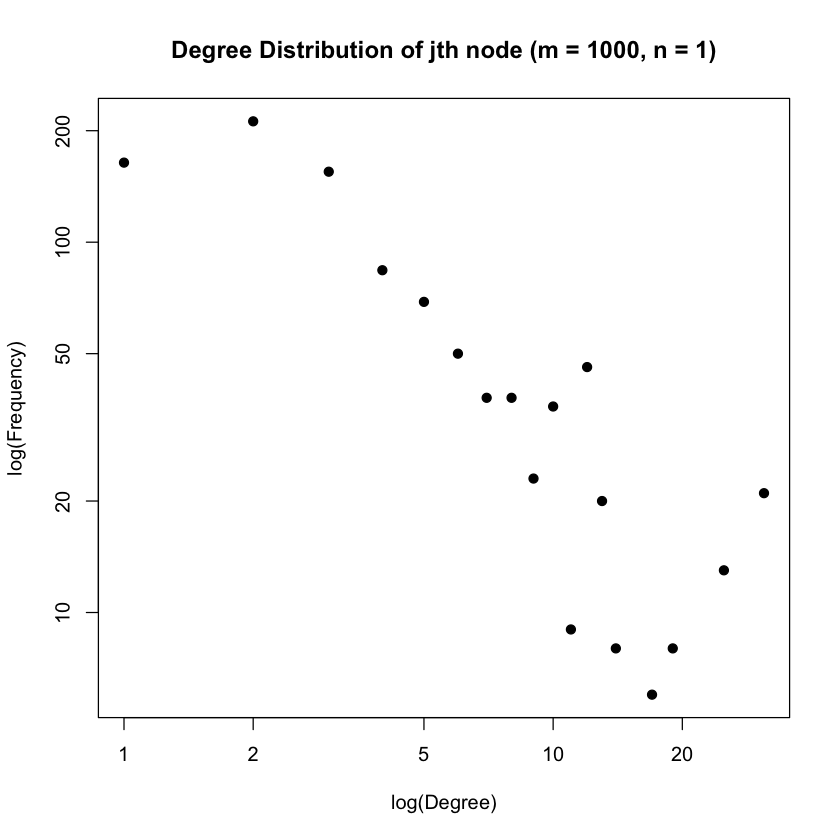

In [51]:
# 1.2 (e)
degree_dist_neighbor <- numeric(0)

for (i in 1: 1000) {
  node_i <- sample(1000, 1)   # get random number between 1 to number of nodes
  neighbors_i <- neighbors(g1, node_i)  
  if (length(neighbors_i) == 1) node_j <- neighbors_i  # if only one neighbor then assign as node_j
  else node_j <- sample(neighbors_i, 1)   # else randomly choose one neighbor for node_j
  degree_dist_neighbor <- c(degree_dist_neighbor, degree(g1, node_j))  # append degree of node_j for the graph
}

# hist(degree_dist_neighbor, main = 'Degree Distribution of jth node (m = 1000, n = 1)', 
#      xlab = 'Degree', ylab = 'Frequency', 
#      breaks = seq(from = min(degree_dist_neighbor), to = max(degree_dist_neighbor), by = 1))

x <- seq(from = min(degree_dist_neighbor), to = max(degree_dist_neighbor))
y <- seq(0, 0, length.out = length(x))
for (i in 1: length(degree_dist_neighbor)) {
    y[degree_dist_neighbor[i]] <- y[degree_dist_neighbor[i]] + 1
}
x_non <- numeric()
y_non <- numeric()
for (i in 1: length(y)) {
    if (y[i] != 0) {
        x_non <- c(x_non, x[i])
        y_non <- c(y_non, y[i])
    }
}

plot(x_non, y_non, log = 'xy', main = 'Degree Distribution of jth node (m = 1000, n = 1)', 
     xlab = 'log(Degree)', ylab = 'log(Frequency)', pch = 19)

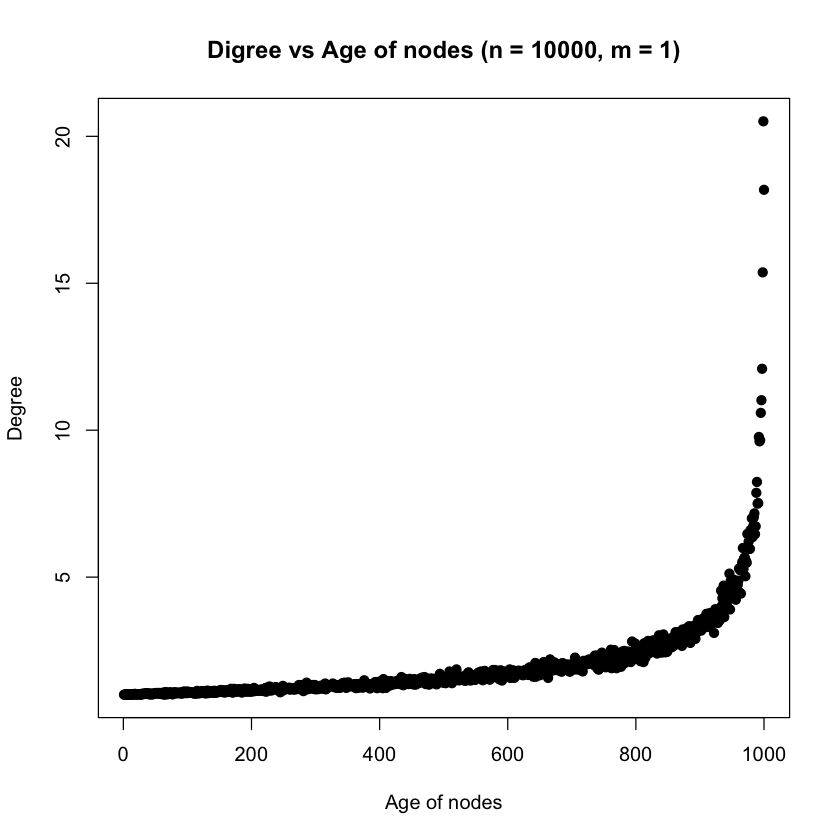

In [287]:
# 1.2 (f)
d <- seq(0, 0, by = 0)
x <- seq(1000, 1, by = -1)
for (i in 1: 100) {
    g <- barabasi.game(1000, m = 1, directed = FALSE)
    d <- d + degree(g)
}
d <- d / 100
plot(x, d, xlab = "Age of nodes", ylab = "Degree",
     main = "Digree vs Age of nodes (n = 10000, m = 1)", pch = 19)

[1] "The modularity of an undirected graph (n = 1000, m = 2): 0.52432592303578"
[1] "The modularity of an undirected graph (n = 10000, m = 2): 0.532469126257329"
[1] "The slope (n = 1000, m = 2): -2.18591664709588"


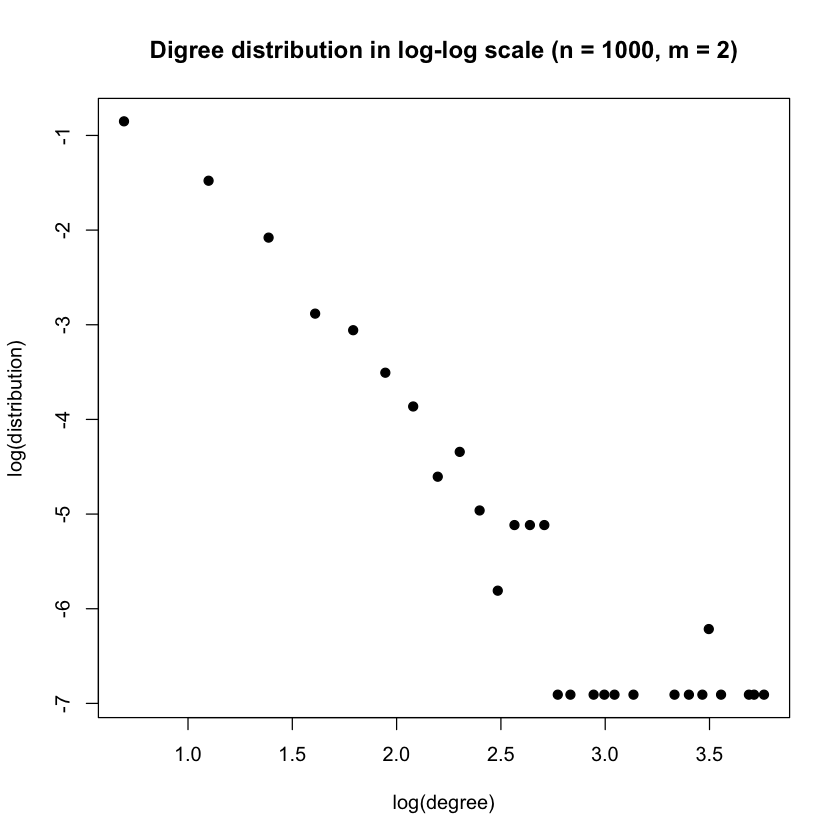

[1] "The slope (n = 10000, m = 2): -2.42734541739679"


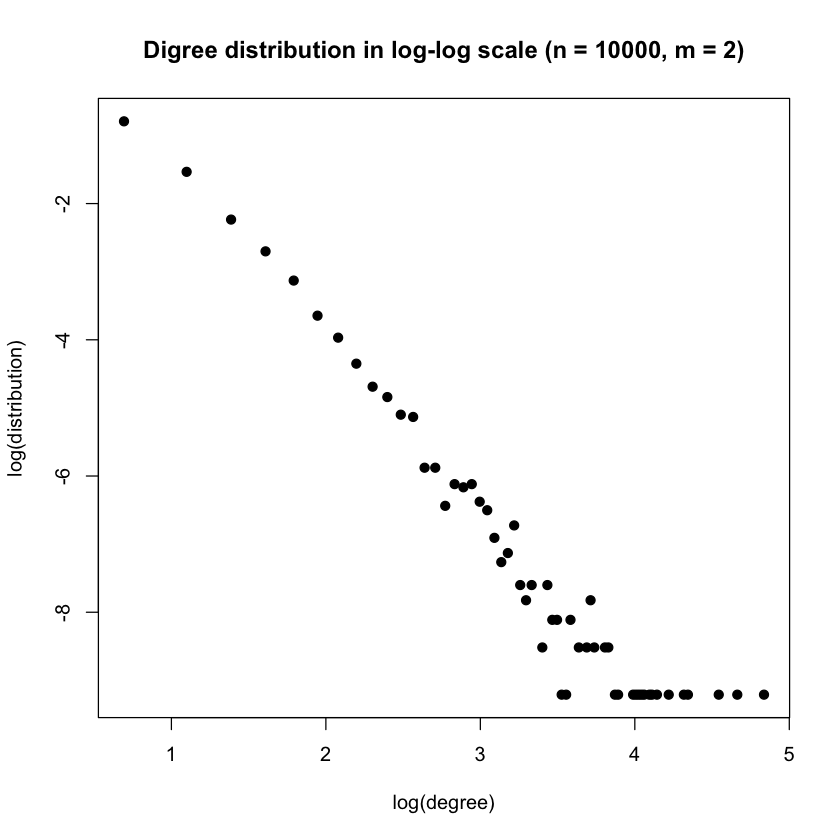

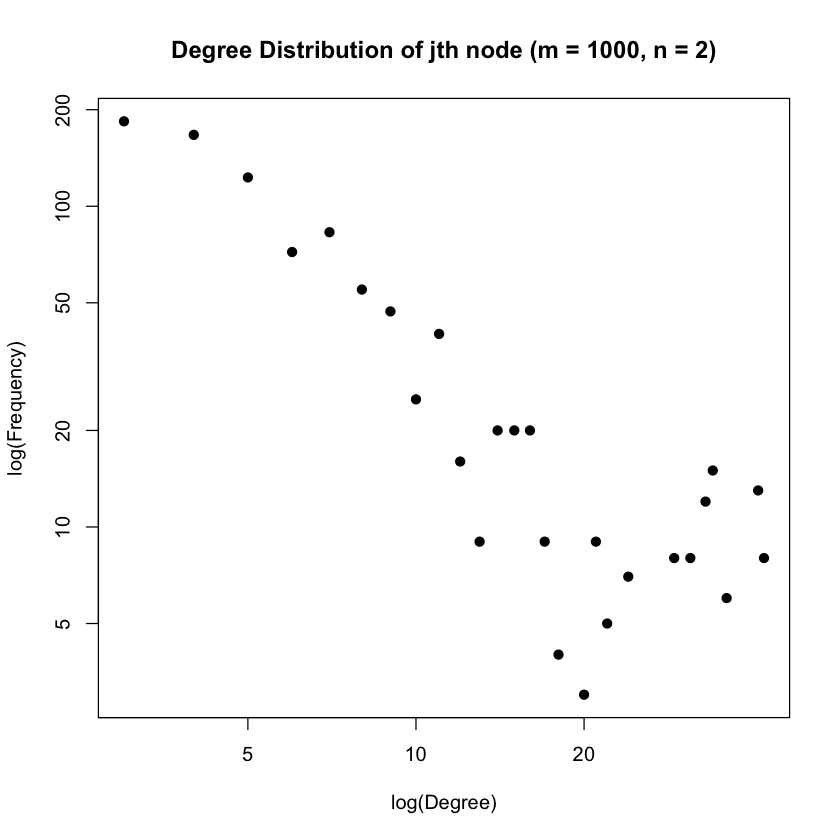

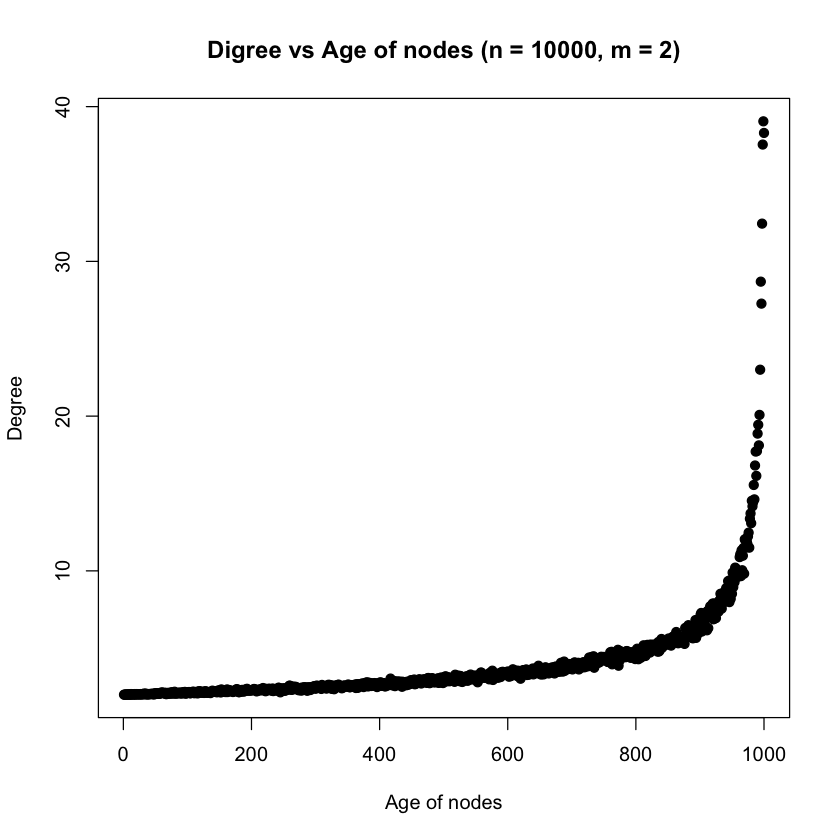

In [64]:
# 1.2 (g) m = 2
# (a) ~ (c) 
# g1 <- sample_pa(1000, m = 2, directed = FALSE)
g1 <- barabasi.game(1000, m = 2, directed = FALSE)
cs1 <- cluster_fast_greedy(g1)
print(paste("The modularity of an undirected graph (n = 1000, m = 2):", modularity(cs1)))

# g2 <- sample_pa(10000, m = 2, directed = FALSE)
g2 <- barabasi.game(10000, m = 2, directed = FALSE)
cs2 <- cluster_fast_greedy(g2)
print(paste("The modularity of an undirected graph (n = 10000, m = 2):", modularity(cs2)))

# (d)
# n = 1000
dd1 <- degree_distribution(g1)
logk1 <- numeric()
logPk1 <- numeric()
for (i in 2: length(dd1)) {
    if (dd1[i] > 0) {
        logk1 <- c(logk1, log(i-1))
        logPk1 <- c(logPk1, log(dd1[i]))
    }
}
plot(logk1, logPk1, xlab = "log(degree)", ylab = "log(distribution)",
     main = "Digree distribution in log-log scale (n = 1000, m = 2)", pch = 19)
slope1 <- lm(logPk1 ~ logk1)$coefficients[2] # get slope
print(paste("The slope (n = 1000, m = 2):", slope1))

# n = 10000
dd2 <- degree_distribution(g2)
logk2 <- numeric()
logPk2 <- numeric()
for (i in 2: length(dd2)) {
    if (dd2[i] > 0) {
        logk2 <- c(logk2, log(i-1))
        logPk2 <- c(logPk2, log(dd2[i]))
    }
}
plot(logk2, logPk2, xlab = "log(degree)", ylab = "log(distribution)",
     main = "Digree distribution in log-log scale (n = 10000, m = 2)", pch = 19)
slope2 <- lm(logPk2 ~ logk2)$coefficients[2] # get slope
print(paste("The slope (n = 10000, m = 2):", slope2))

# (e)
degree_dist_neighbor <- numeric(0)

for (i in 1: 1000) {
  node_i <- sample(1000, 1)   # get random number between 1 to number of nodes
  neighbors_i <- neighbors(g1, node_i)  
  if (length(neighbors_i) == 1) node_j <- neighbors_i  # if only one neighbor then assign as node_j
  else node_j <- sample(neighbors_i, 1)   # else randomly choose one neighbor for node_j
  degree_dist_neighbor <- c(degree_dist_neighbor, degree(g1, node_j))  # append degree of node_j for the graph
}

x <- seq(from = min(degree_dist_neighbor), to = max(degree_dist_neighbor))
y <- seq(0, 0, length.out = length(x) )
for (i in 1: length(degree_dist_neighbor)) {
    y[degree_dist_neighbor[i]] <- y[degree_dist_neighbor[i]] + 1
}
x_non <- numeric()
y_non <- numeric()
for (i in 1: (length(y) - 1)) {
    if (y[i] != 0) {
        x_non <- c(x_non, x[i])
        y_non <- c(y_non, y[i])
    }
}

plot(x_non, y_non, log = 'xy', main = 'Degree Distribution of jth node (m = 1000, n = 2)', 
     xlab = 'log(Degree)', ylab = 'log(Frequency)', pch = 19)

# (f)
d <- seq(0, 0, by = 0)
x <- seq(1000, 1, by = -1)
for (i in 1: 100) {
    g <- barabasi.game(1000, m = 2, directed = FALSE)
    d <- d + degree(g)
}
d <- d / 100
plot(x, d, xlab = "Age of nodes", ylab = "Degree",
     main = "Digree vs Age of nodes (n = 10000, m = 2)", pch = 19)

[1] "The modularity of an undirected graph (n = 1000, m = 5): 0.273506376702827"
[1] "The modularity of an undirected graph (n = 10000, m = 5): 0.532469126257329"
[1] "The slope (n = 1000, m = 5): -2.19574453136518"


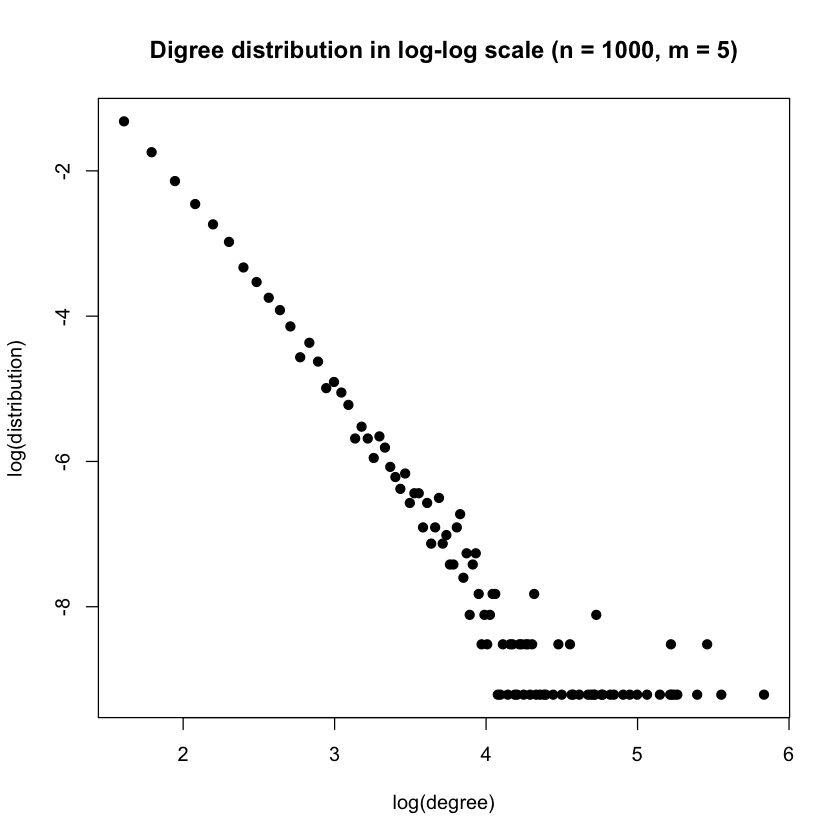

[1] "The slope (n = 10000, m = 5): -2.42734541739679"


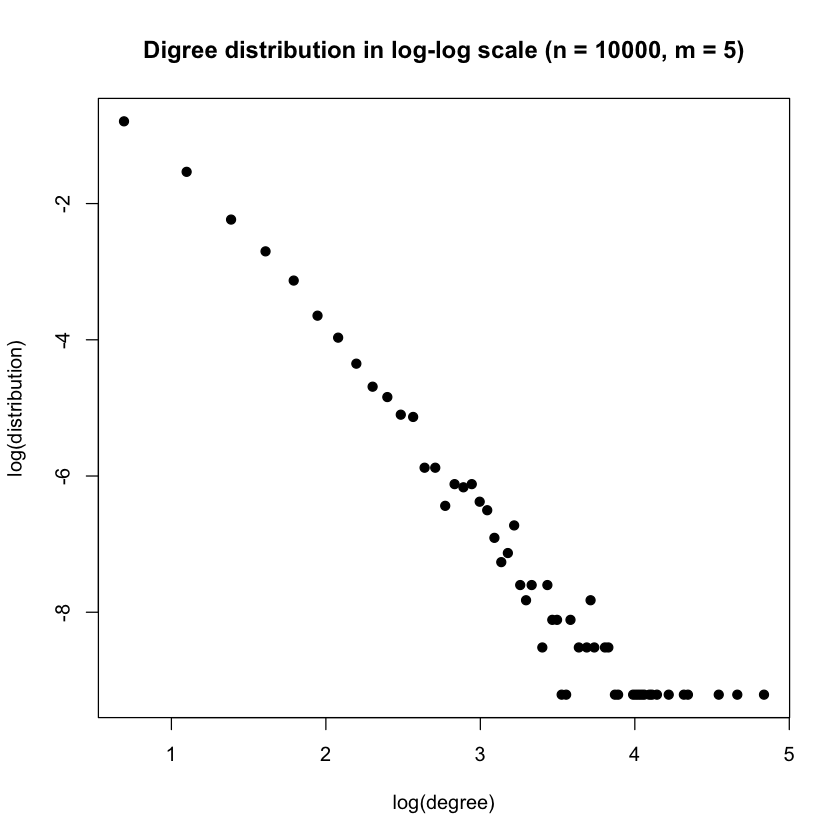

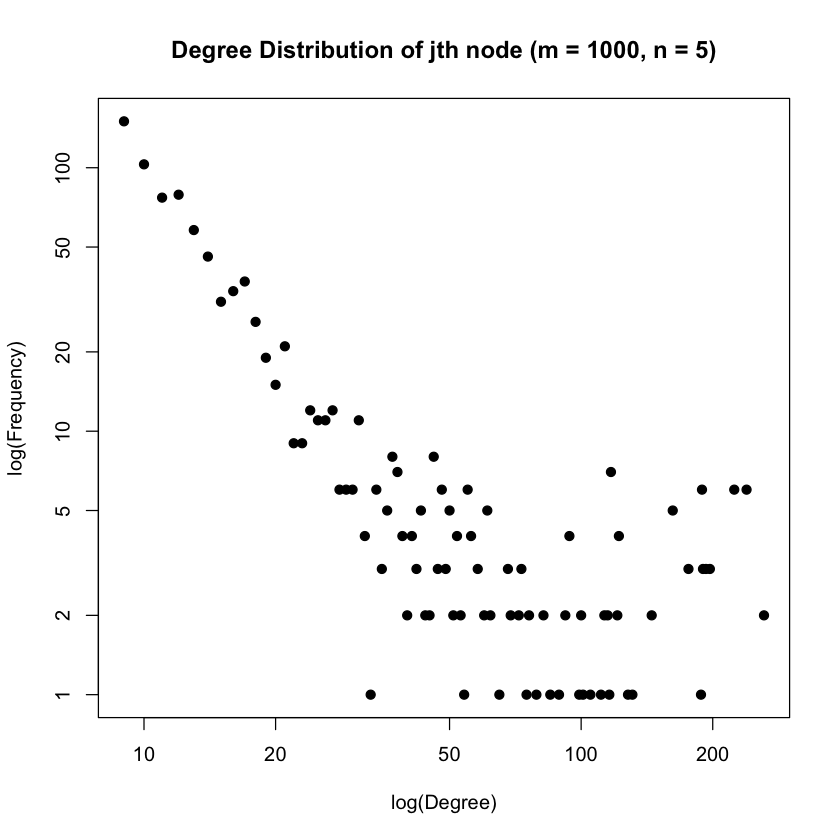

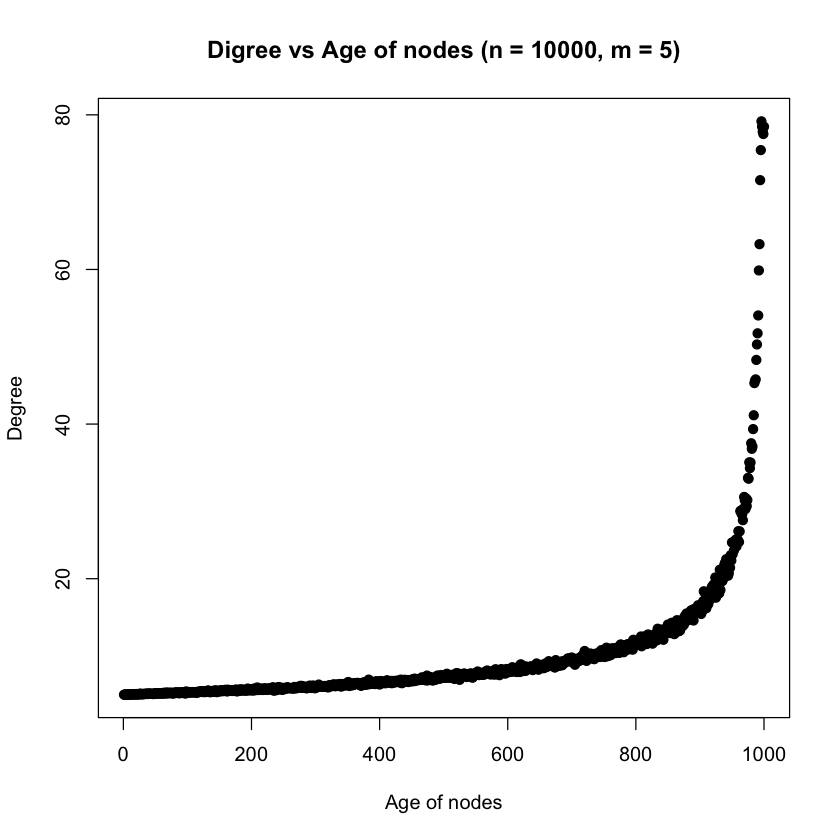

In [67]:
# 1.2 (g) m = 5
# (a) ~ (c) 
# g1 <- sample_pa(1000, m = 5, directed = FALSE)
g1 <- barabasi.game(1000, m = 5, directed = FALSE)
cs1 <- cluster_fast_greedy(g1)
print(paste("The modularity of an undirected graph (n = 1000, m = 5):", modularity(cs1)))

# g2 <- sample_pa(10000, m = 5, directed = FALSE)
g1 <- barabasi.game(10000, m = 5, directed = FALSE)
cs2 <- cluster_fast_greedy(g2)
print(paste("The modularity of an undirected graph (n = 10000, m = 5):", modularity(cs2)))

# (d)
# n = 1000
dd1 <- degree_distribution(g1)
logk1 <- numeric()
logPk1 <- numeric()
for (i in 2: length(dd1)) {
    if (dd1[i] > 0) {
        logk1 <- c(logk1, log(i-1))
        logPk1 <- c(logPk1, log(dd1[i]))
    }
}
plot(logk1, logPk1, xlab = "log(degree)", ylab = "log(distribution)",
     main = "Digree distribution in log-log scale (n = 1000, m = 5)", pch = 19)
slope1 <- lm(logPk1 ~ logk1)$coefficients[2] # get slope
print(paste("The slope (n = 1000, m = 5):", slope1))

# n = 10000
dd2 <- degree_distribution(g2)
logk2 <- numeric()
logPk2 <- numeric()
for (i in 2: length(dd2)) {
    if (dd2[i] > 0) {
        logk2 <- c(logk2, log(i-1))
        logPk2 <- c(logPk2, log(dd2[i]))
    }
}
plot(logk2, logPk2, xlab = "log(degree)", ylab = "log(distribution)",
     main = "Digree distribution in log-log scale (n = 10000, m = 5)", pch = 19)
slope2 <- lm(logPk2 ~ logk2)$coefficients[2] # get slope
print(paste("The slope (n = 10000, m = 5):", slope2))

# (e)
degree_dist_neighbor <- numeric(0)

for (i in 1: 1000) {
  node_i <- sample(1000, 1)   # get random number between 1 to number of nodes
  neighbors_i <- neighbors(g1, node_i)  
  if (length(neighbors_i) == 1) node_j <- neighbors_i  # if only one neighbor then assign as node_j
  else node_j <- sample(neighbors_i, 1)   # else randomly choose one neighbor for node_j
  degree_dist_neighbor <- c(degree_dist_neighbor, degree(g1, node_j))  # append degree of node_j for the graph
}

x <- seq(from = min(degree_dist_neighbor), to = max(degree_dist_neighbor))
y <- seq(0, 0, length.out = length(x) )
for (i in 1: length(degree_dist_neighbor)) {
    y[degree_dist_neighbor[i]] <- y[degree_dist_neighbor[i]] + 1
}
x_non <- numeric()
y_non <- numeric()
for (i in 1: (length(y) - 4)) {
    if (y[i] != 0) {
        x_non <- c(x_non, x[i])
        y_non <- c(y_non, y[i])
    }
}

plot(x_non, y_non, log = 'xy', main = 'Degree Distribution of jth node (m = 1000, n = 5)', 
     xlab = 'log(Degree)', ylab = 'log(Frequency)', pch = 19)

# (f)
d <- seq(0, 0, by = 0)
for (i in 1: 100) {
    g <- barabasi.game(1000, m = 5, directed = FALSE)
    d <- d + degree(g)
}
d <- d / 100
x <- seq(1000, 1, by = -1)
plot(x, d, xlab = "Age of nodes", ylab = "Degree",
     main = "Digree vs Age of nodes (n = 10000, m = 5)", pch = 19)

[1] "The modularity of the preferential attachment model 0.898989079169259"


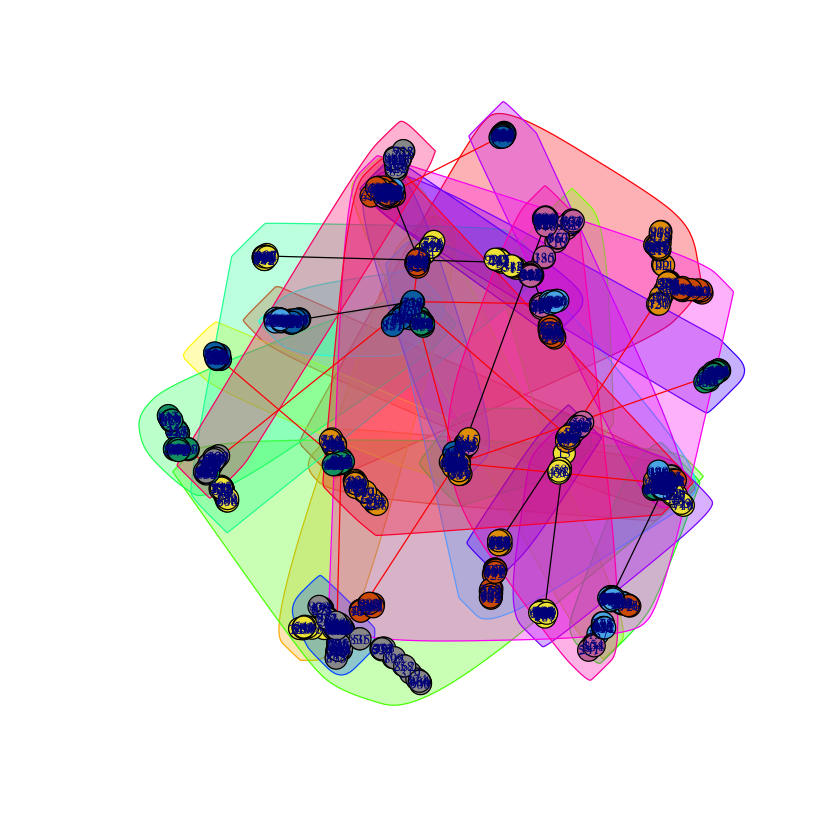

[1] "The modularity of the stub matching 0.799838531821046"


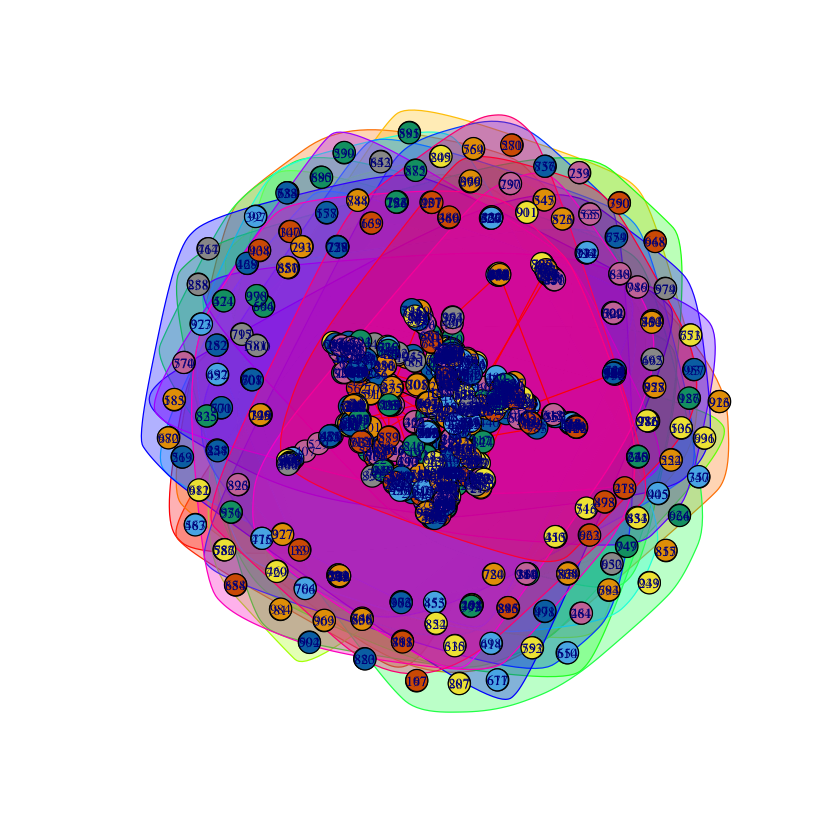

In [249]:
# 1.2 (h)
mark_comm_modu = function(g, name) {
    clusters_graph <- clusters(g)  
    index_GCC <- which.max(clusters_graph$csize)  
    non_GCC_nodes <- (1:vcount(g))[clusters_graph$membership != index_GCC]  
    GCC <- delete.vertices(g, non_GCC_nodes)  
    community_GCC <- spinglass.community(GCC)
    modularity_GCC <- modularity(community_GCC) 
    plot(community_GCC, g, vertex.size = 8, vertex.label.cex = 0.7)    
    print(paste("The modularity of the", name, modularity_GCC))
}

g1 <- barabasi.game(1000, m = 1, directed = FALSE)
g2 <- sample_degseq(degree(g1), method = "simple.no.multiple")

mark_comm_modu(g1, "preferential attachment model") 
mark_comm_modu(g2, "stub matching") 